# Travaux Pratiques de Modélisation Géologique et Géostatistique
O. Kaufmann - 2018 - 2020; O. Kaufmann & Q. Campeol, 2021-2024.
## Séance 4

***
## 1. Chargement des packages

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>1.1 Imports</b>
</div>

In [40]:

# @info: Execute me to activate interactive questions
# ---------------------------------------------------

# O. KAUFMANN, 2024. 

from IPython import get_ipython
from IPython.core import magic_arguments
from IPython.core.magic import register_cell_magic
import ipywidgets as widgets
from IPython.display import HTML, clear_output
import codecs

def decode_text(text):
    return codecs.decode(text, 'hex').decode('utf')

def encode_text(text):
    return codecs.encode(codecs.encode(text,'utf8'), 'hex').decode('utf')
    
@magic_arguments.magic_arguments()
@magic_arguments.argument('--prompt', default='none', help='Encoded prompt')
@magic_arguments.argument('--answer', default='none', help='Encoded answer')
@magic_arguments.argument('--title', default='Question', help='First line of alert block')
@magic_arguments.argument('--button-label', default='Solution', help='Text to display on button')
@magic_arguments.argument('--div-type', default='alert-warning', help='Type of alert block')
    
@register_cell_magic
def display_prompt(line, cell):
    args = magic_arguments.parse_argstring(display_prompt, line)
    title = args.title
    prompt = args.prompt
    answer = args.answer
    button_label = args.button_label
    div_type = args.div_type
    def make_block(text, title=title, label=button_label, div_type=div_type):
        if title != 'none':
            return HTML(f"""<div class="alert alert-block {div_type}"> <b>{title}</b><br> {text} </div>""")
        else:
            return HTML(f"""<div class="alert alert-block {div_type}"> {text} </div>""")
    if prompt != 'none':
        display(make_block(decode_text(prompt)))
    toggle_button = widgets.ToggleButton(description=button_label)
    output = widgets.Output()
    def on_button_clicked(b):
        with output:
            if b['new']:  
                display(HTML(decode_text(answer)))
            else:
                output.clear_output()
    toggle_button.observe(on_button_clicked, 'value')
    display(toggle_button)
    display(output)

HTML("""<div class="alert alert-block alert-success"> <b>Success:</b><br>Interactive questions activated.</div>""")


Important: Exécutez-moi pour activer les questions interactives.

In [41]:
%load_ext rpy2.ipython
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rpy2

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>1.2 Installer et charger les packages <i>raster</i> et <i>gstat</i> </b>
</div>

- Vérifiez pour chacun des <b>packages</b> requis s'il est déjà installé et, le cas écheant, quelle est la version installée?

In [42]:
%%R

list_of_packages <- installed.packages()
list_of_packages[c('gstat', 'raster'), c('Version')]

   gstat   raster 
 "2.1-0" "3.6-26" 


- Si nécessaire, installez les <b>packages</b> manquants

- Chargez les <b>packages</b> <i>raster</i> et <i>gstat</i>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     La documentation de gstat est accessible <a href="http://cran.r-project.org/web/packages/gstat/gstat.pdf">ici</a>.
</div>

***
## 2. Exploration du jeu de données <i>Robena Mine (US, Penn) coal ash</i> 
### Jeu de données contenu dans le package <i>gstat</i>
Data obtained from Gomez and Hazen (1970, Tables 19 and 20) on coal ash for the Robena Mine Property in Greene County Pennsylvania.

![Robena Mine Photo](./Image_file/Robena_Mine_01.jpg )  |  ![Robena Mine Photo](./Image_file/Robena_Mine_02.jpg)
- | - 
Vue 1 | Vue 2

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>2.1 Charger le jeu de données</b>
</div>

- Vérifiez ce qui est présent dans l'espace de travail (<b>workspace</b>)

- Chargez le jeu de données <b>coalash</b> du package <code>R</code> *gstat*

-  Essayez la commande help sur le jeu de données:

In [46]:
%%R
help(coalash)

File: /tmp/RtmpOdXL8n/Rtxt6fb32a152b1e
coalash                 package:gstat                  R Documentation



Coal ash samples from a mine in Pennsylvania



Description:



     Data obtained from Gomez and Hazen (1970, Tables 19 and 20) on

     coal ash for the Robena Mine Property in Greene County

     Pennsylvania.



Usage:



     data(coalash)

     

Format:



     This data frame contains the following columns:



     x a numeric vector; x-coordinate; reference unknown



     y a numeric vector; x-coordinate; reference unknown



     coalash the target variable



Note:



     data are also present in package fields, as coalash.



Author(s):



     unknown; R version prepared by Edzer Pebesma; data obtained from

     <URL: http://homepage.divms.uiowa.edu/~dzimmer/spatialstats/>,

     Dale Zimmerman's course page



References:



     N.A.C. Cressie, 1993, Statistics for Spatial Data, Wiley.



     Gomez, M. and Hazen, K. (1970). Evaluating sulfur and ash

     

- Vérifiez que le nouveau jeu de donnée est présent dans l'espace de travail de <code>R</code> et affichez un résumé du jeu de données

- Déterminez quel est la classe et le mode du jeu de données dans l'espace de travail de <code>R</code>

- Transférez le dataframe coalash dans un dataframe pandas

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>2.2 Explorer le jeu de données</b>
</div>

- Examinez le contenu du jeu de données 

In [ ]:
# Résultat attendu ci-dessous...

,x,y,coalash
1,1,14,10.21
2,1,15,9.92
3,1,16,11.17
4,2,8,10.01
5,2,10,11.15


- Faites-en un **Geodataframe** et affichez la teneur en cendres des charbons sur une carte.

In [51]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e6764665f636f616c617368203d206770642e47656f446174614672616d6528636f616c6173682c2067656f6d657472793d6770642e706f696e74735f66726f6d5f787928636f616c6173685b2778275d2c20636f616c6173685b2779275d2920293c62723e0a3c62723e0a7072696e7428224e6f6d627265206427c3a96368616e74696c6c6f6e732064616e73206c65206a657520646520646f6e6ec3a96573203a222c206c656e286764665f636f616c61736829293c62723e0a646973706c6179286764665f636f616c6173682e68656164282920293c62723e0a3c62723e0a6669672c206178203d20706c742e737562706c6f74732866696773697a653d28382c3829293c62723e0a6764665f636f616c6173682e706c6f742827636f616c617368272c2061783d61782c20636d61703d276a6574272c206c6567656e643d54727565293c62723e0a61782e7365745f7469746c65282274656e65757220656e2063656e647265732064752063686172626f6e22293c62723e0a61782e7365745f796c6162656c28275927293c62723e0a61782e7365745f786c6162656c28275827293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


Nombre d'échantillons dans le jeu de données : 208


,x,y,coalash,geometry
1,1,14,10.21,POINT (1.00000 14.00000)
2,1,15,9.92,POINT (1.00000 15.00000)
3,1,16,11.17,POINT (1.00000 16.00000)
4,2,8,10.01,POINT (2.00000 8.00000)
5,2,10,11.15,POINT (2.00000 10.00000)


Text(0.5, 58.7222222222222, 'X')

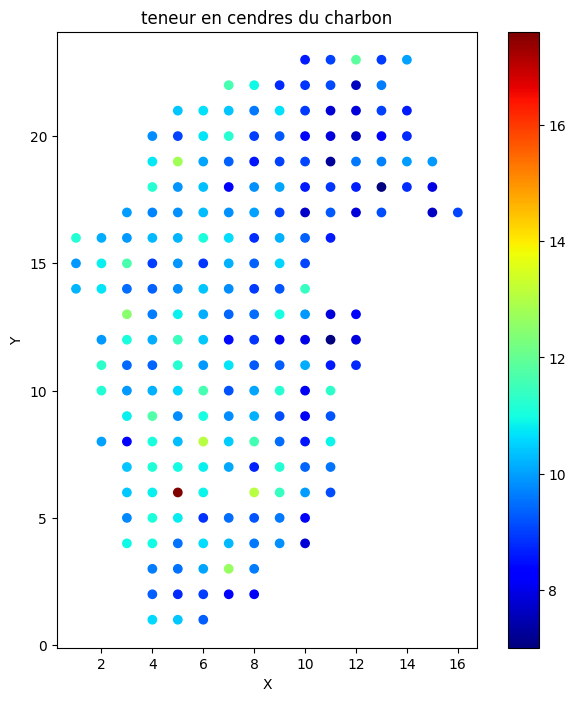

In [ ]:
# Résultat attendu ci-dessous...

- Affichez le résumé et tracez un histogramme de la teneur en cendres des charbons

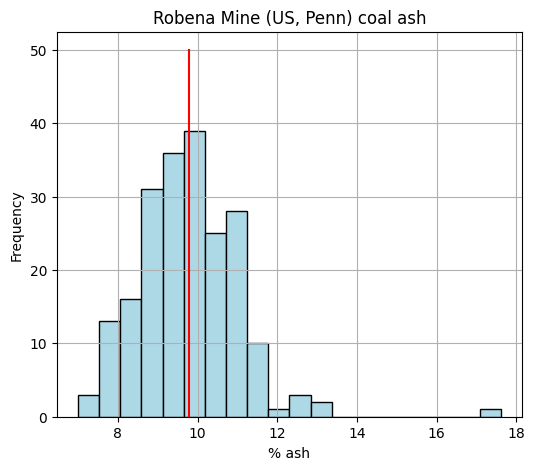

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>2.3 Examiner la distribution de la variable <i>coalash</i></b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.3.1: </b><br>Peut-on faire l'hypothèse d'une distribution normale?
</div>

- Affichez un diagramme Quantile-Quantile (_Q-Q plot_) dans <code>R</code>   

Quelles conclusions en tirez-vous?

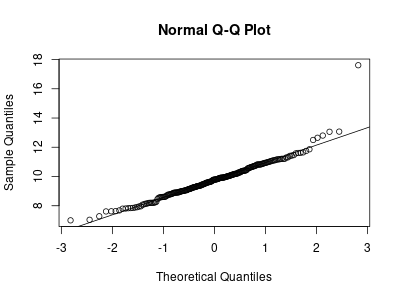

In [ ]:
# Résultat attendu ci-dessous...

- Vérifiez à l'aide du test de Shapiro s'il est plausible que la teneur suive une loi normale

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Utilisez la fonction <code>shapiro.test</code>
</div>

In [55]:
%%R

? shapiro.test

File: /tmp/RtmpOdXL8n/Rtxt6fb373d5f144
shapiro.test               package:stats               R Documentation



Shapiro-Wilk Normality Test



Description:



     Performs the Shapiro-Wilk test of normality.



Usage:



     shapiro.test(x)

     

Arguments:



       x: a numeric vector of data values. Missing values are allowed,

          but the number of non-missing values must be between 3 and

          5000.



Value:



     A list with class ‘"htest"’ containing the following components:



statistic: the value of the Shapiro-Wilk statistic.



 p.value: an approximate p-value for the test.  This is said in Royston

          (1995) to be adequate for ‘p.value < 0.1’.



  method: the character string ‘"Shapiro-Wilk normality test"’.



data.name: a character string giving the name(s) of the data.



Source:



     The algorithm used is a C translation of the Fortran code

     described in Royston (1995).  The calculation of the p value is

     exact for n = 3, otherwi

In [ ]:
# Résultat attendu ci-dessous...


	Shapiro-Wilk normality test

data:  coalash$coalash
W = 0.93761, p-value = 8.865e-08



In [ ]:

%%display_prompt --title Question 2.3.2: --prompt 5175656c6c652065737420766f74726520636f6e636c7573696f6e3f0a --answer 4c6120702d76616c756520c3a974616e7420266c743b302e30352c206f6e20706575742072656a65746572206c276879706f7468c3a873652073656c6f6e206c617175656c6c65206c27c3a96368616e74696c6c6f6e2070726f7669656e74206427756e6520646973747269627574696f6e206e6f726d616c652e
# @info: Exécutez-moi pour afficher la question

Question 2.3.2: Quelle est votre conclusion?

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>2.4 Filtrer le jeu de données</b>
</div>

- Déterminez quel est l'échantillon qui correspond au déviant (_outlier_) le plus marqué et créez un nouveau jeu de données nommé <i>robena</i> qui exclut cet échantillon

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Utilisez la méthode <code>drop</code> de la classe DataFrame de pandas pour exclure le déviant
</div>

- Comparez la variance du jeu de données avant et après suppression du déviant

In [ ]:
# Résultat attendu ci-dessous...

Variance avant suppression du déviant : 1.629%²
Variance après suppression du déviant : 1.338%²


<div class="alert alert-block alert-info">
<b>Info:</b><br>     Si robena est un <b>GeoDataFrame</b>, il possède une colonne <b>geometry</b> dont le type ne peut être traduit dans <code>R</code>.<br> Il faut donc supprimer cette colonne avant d'envoyer ce jeu de données dans l'espace de travail de <code>R</code> avec <code>rpy2</code>.
</div>

In [60]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e726f62656e61203d206764665f726f62656e612e636f707928293c62723e0a726f62656e612e64726f70285b2767656f6d65747279275d2c20617869733d312c20696e706c6163653d54727565293c62723e0a726f62656e612e6865616428293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


In [ ]:
# Résultat attendu ci-dessous...

,x,y,coalash
1,1,14,10.21
2,1,15,9.92
3,1,16,11.17
4,2,8,10.01
5,2,10,11.15


<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>2.5 Examiner la distribution du jeu de données filtré</b>
</div>

- Vérifiez s'il est plausible que la teneur du jeu de données filtré suive une loi normale à l'aide d'un test statistique

In [ ]:
# Résultat attendu ci-dessous...


	Shapiro-Wilk normality test

data:  robena$coalash
W = 0.99228, p-value = 0.3467



In [ ]:

%%display_prompt --title Question 2.5.1: --prompt 5175656c6c652065737420766f74726520636f6e636c7573696f6e3f0a --answer 4c6120702d76616c756520c3a974616e74202667743b302e30352c206f6e203c623e6e653c2f623e2070657574203c623e7061733c2f623e2072656a65746572206c276879706f7468c3a873652073656c6f6e206c617175656c6c65206c27c3a96368616e74696c6c6f6e2070726f7669656e74206427756e6520646973747269627574696f6e206e6f726d616c652e
# @info: Exécutez-moi pour afficher la question

Question 2.5.1: Quelle est votre conclusion?

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>2.6 Afficher la répartition spatiale des échantillons</b>
</div>

In [ ]:

%%display_prompt --title Question 2.6.1: --prompt 436f6d6d656e74206c6f63616c69736572206c652064c3a97669616e743f0a0a --answer 536f6c7574696f6e2073696d706c65203a20616666696368657a20756e65206361727465206fc3b920766f7573207375706572706f736572657a206175206a657520646520646f6e6ec3a9657320696e697469616c206c65206a657520646520646f6e6ec3a965732066696c7472c3a920656e207574696c6973616e742064657320636f756c657572732064696666c3a972656e7465732e
# @info: Exécutez-moi pour afficher la question

Question 2.6.1: Comment localiser le déviant?

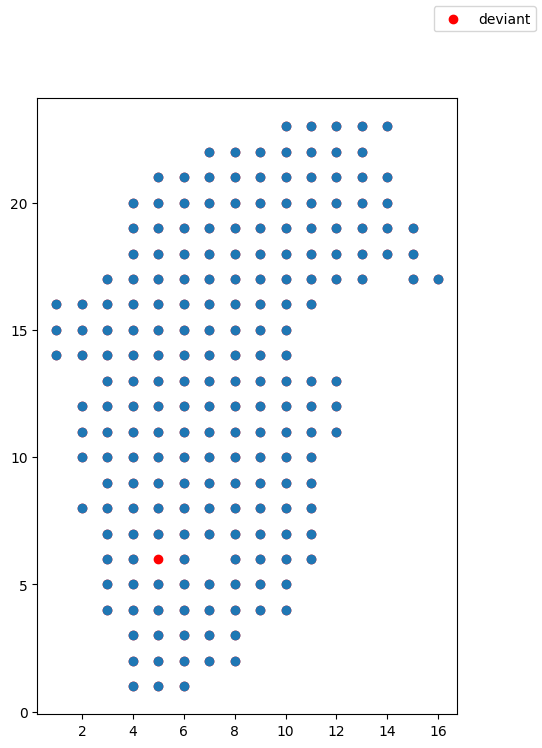

In [ ]:
# Résultat attendu ci-dessous...

- Affichez des symboles dont la taille est proportionnelle à la variable <b>coalash</b>. <br> Commencez par écrire une fonction nommée *scale_symbols* pour déterminer la taille du symbole en fonction de la valeur de la variable.

In [63]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e406b6565705f6f7574706f75743c62723e0a646566207363616c655f73796d626f6c732878293a3c62723e0a2020202072657475726e2035302a782a2a332f6e702e6d65616e2878292a2a333c62723e0a78203d206e702e6172616e676528372c31352c202e31293c62723e0a706c742e706c6f7428782c207363616c655f73796d626f6c732878292c20272d7227293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


***
## 3. Préparation des outils pour la représentation des résultats sur carte

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>3.1 Créer une grille pour les prédictions</b>
</div>

In [65]:
import rasterio as rio
from rasterio import Affine, features
from rasterio.plot import show
from rasterio.mask import mask

- Construisez une aire englobant les points d'échantillonnage à l'aide un buffer de rayon 2 autour de l'enveloppe convexe des points d'échantillonnage

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Décomposez le problème en plusieurs étapes. Commencez par constuire une <b>géométrie</b> réunissant les <b>géoséries</b> des points d'échantillonage du <b>GeoDataFrame</b>. Construisez ensuite <b>l'enveloppe convexe</b> de cette géométrie et appliquez-y un <b>buffer</b> de rayon souhaité.
</div>

In [66]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e635f68756c6c203d206764665f636f616c6173682e67656f6d657472792e756e6172795f756e696f6e2e636f6e7665785f68756c6c2e6275666665722832293c62723e0a635f68756c6c3c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


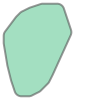

In [ ]:
# Résultat attendu ci-dessous...

- Recherchez une solution alternative basée sur l'utilisation d'un *buffer* de rayon 2 autour des points d'échantillonnage

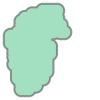

In [ ]:
# Résultat attendu ci-dessous...

- Construire la grille d'estimation suppose de choisir une résolution, fixez le nombre de pixels par unité de longueur à 10

In [68]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e657374696d6174696f6e5f7a6f6e65203d20635f68756c6c3c62723e0a706978656c735f7065725f756e69745f6c656e677468203d2031303c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


- Déterminez le nombre de lignes et colonnes nécessaires pour la grille 

In [69]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e6d696e782c206d696e792c206d6178782c206d617879203d20657374696d6174696f6e5f7a6f6e652e626f756e64733c62723e0a6e636f6c73203d20696e7428286d6178782d6d696e78292a706978656c735f7065725f756e69745f6c656e677468293c62723e0a6e726f7773203d20696e7428286d6178792d6d696e79292a706978656c735f7065725f756e69745f6c656e677468293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


- À partir des informations obtenues dans les deux cellules ci-dessus, déterminez la transformation affine pour passer de l'espace de la grille à l'espace des coordonnées du jeu de données

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Utilisez la fonction <b>Affine</b> de la librairie <code>Rasterio</code>.
</div>

In [70]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e7472616e73666f726d203d20416666696e6528312f706978656c735f7065725f756e69745f6c656e6774682c20302c206d696e782c20302c202d312f706978656c735f7065725f756e69745f6c656e6774682c206d617879293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


- *Rasterisez* le masque utilisé pour déterminer les pixels de la grille où une évaluation devra être faite

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Utilisez une méthode de la classe <b>features</b> de la librairie <code>Rasterio</code> pour rasteriser la grille et sauvegardez ce raster dans un fichier <i>robena_estimation_grid.tif</i>.
</div>

In [71]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e696d6167655f66696c65203d20272e2f726f62656e615f657374696d6174696f6e5f677269642e746966273c62723e0a6d657461646174613d7b277472616e73666f726d273a207472616e73666f726d2c2027686569676874273a206e726f77732c20277769647468273a206e636f6c732c2027636f756e74273a20312c3c62723e0a20202020202020202020276474797065273a2027696e743332272c20276e6f64617461273a20307d3c62723e0a726173746572203d2066656174757265732e726173746572697a65285b657374696d6174696f6e5f7a6f6e655d2c206f75745f73686170653d286e726f77732c206e636f6c73292c207472616e73666f726d3d7472616e73666f726d293c62723e0a776974682072696f2e6f70656e28696d6167655f66696c652c202777272c202a2a6d6574616461746129206173206473743a3c62723e0a202020206473742e7772697465287261737465722c2031293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


- Représentez sur une même figure les points d'échantillonnage et la grille d'évaluation

In [72]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e6669672c206178203d20706c742e737562706c6f74732866696773697a653d28382c3829293c62723e0a6f7574203d2072696f2e6f70656e28696d6167655f66696c652c20277227293c62723e0a73686f77286f75742c2061783d6178293c62723e0a6764665f636f616c6173682e706c6f742861783d61782c206d61726b65723d2778272c20636f6c6f723d276772657927293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


***
## 4. Interpolation

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>4.1 Interpoler la teneur en cendres par la méthode de la pondération par l'inverse de la distance</b>
</div>

- gstat nécessite une grille qui soit un objet de la classe **SpatialPixelsDataFrame**. Importez dans l'environnement <code>R</code> le fichier robena_estimation_grid.tif avec la librairie <b>Raster</b>. Convertissez ensuite la grille en **SpatialPixelsDataFrame** puis spécifiez le CRS : <code>+proj=merc +nodefs</code>.

- Convertissez le dataframe robena également en un objet de la classe SpatialPointsDataFrame. Prenez exemple de ce qui est réalisé pour coalash ci-dessous. Menez l'interpolation par Pondération inverse à la distance des teneurs en cendres et sauvegardez le résultat sous forme d'une image au format GeoTiff

In [74]:
%%R
xy = coalash[,c('x', 'y')]
coalash = SpatialPointsDataFrame(coords = xy, data = coalash,
                               proj4string = CRS("+proj=merc +nodefs"))

In [75]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e252552202d6920726f62656e61202d6f20696d6167655f66696c653c62723e0a20203c62723e0a7879203d20726f62656e615b2c63282778272c20277927295d3c62723e0a726f62656e61203d205370617469616c506f696e7473446174614672616d6528636f6f726473203d2078792c2064617461203d20726f62656e612c3c62723e0a2020202020202020202020202020202020202020202020202020202020202070726f6a34737472696e67203d2043525328222b70726f6a3d6d657263202b6e6f646566732229293c62723e0a726f62656e612e696477203c2d206b7269676528636f616c6173687e312c20726f62656e612c20726f62656e612e67726964293c62723e0a696d6167655f66696c65203c2d20272e2f726f62656e615f6964772e746966273c62723e0a777269746552617374657228617328726f62656e612e6964772c20225261737465724c6179657222292c20696d6167655f66696c652c206f76657277726974653d54525545293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


In [ ]:
# Résultat attendu ci-dessous...

[inverse distance weighted interpolation]


In [76]:
%%R
help(krige)

File: /tmp/RtmpOdXL8n/Rtxt6fb31182ca22
krige                  package:gstat                   R Documentation



Simple, Ordinary or Universal, global or local, Point or Block Kriging,

or simulation.



Description:



     Function for simple, ordinary or universal kriging (sometimes

     called external drift kriging), kriging in a local neighbourhood,

     point kriging or kriging of block mean values (rectangular or

     irregular blocks), and conditional (Gaussian or indicator)

     simulation equivalents for all kriging varieties, and function for

     inverse distance weighted interpolation.  For multivariable

     prediction, see gstat and predict



Usage:



     krige(formula, locations, ...)

     krige.locations(formula, locations, data, newdata, model, ..., beta, nmax

     = Inf, nmin = 0, omax = 0, maxdist = Inf, block, nsim = 0, indicators = FALSE,

     na.action = na.pass, debug.level = 1)

     krige.spatial(formula, locations, newdata, model, ..., beta, nmax

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>4.2 Afficher le résultat de l'interpolation par l'inverse de la distance</b>
</div>

- Voici une fonction **plot_interpolation_results** pour afficher les résultats sous forme de carte en y superposant les points d'échantillonnage

In [77]:
def plot_interpolation_results(image_file, gdf, **kwargs):
    cmap = kwargs.pop('cmap', 'hsv')
    title = kwargs.pop('title', '')
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_title(title, fontsize= 20)
    with rio.open(image_file, 'r') as out:
        spatial_extent = [out.bounds.left, out.bounds.right, out.bounds.bottom, out.bounds.top]
        data = out.read(1, masked=True)
    im = ax.imshow(data, cmap=cmap, extent=spatial_extent, **kwargs)
    gdf.plot(ax=ax, marker='x', color='grey')
    fig.colorbar(im)

- Affichez la carte des teneurs en cendres interpolées

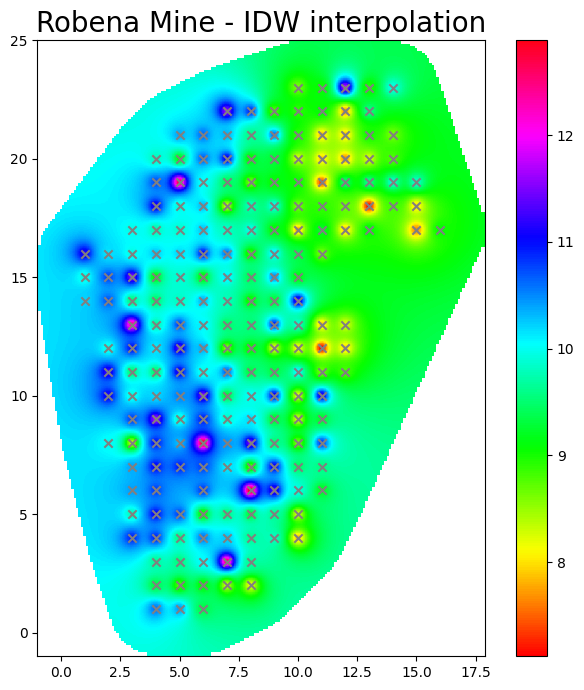

In [ ]:
# Résultat attendu ci-dessous...

***
<div class="alert alert-block alert-danger" align="center">
    <b>FIN DE LA QUATRIEME SEANCE</b>
</div>